In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import sys 
sys.path.append('../../src')

from spaceoracle.prophets import Prophet

2024-11-27 15:42:36.916911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
adata_train = sc.read_h5ad(
    '/ix/djishnu/shared/djishnu_kor11/training_data/slideseq_spleen.h5ad')

pythia = Prophet(
    adata=adata_train,
    save_dir='/ix/djishnu/shared/djishnu_kor11/models_spleen',
    annot='clusters',
    annot_labels='Cell_Type'
)

In [4]:
pythia.compute_betas()

100%|██████████| 2627/2627 [00:47<00:00, 54.91it/s]


In [5]:
goi = 'Prdm1'
goi in pythia.adata.var_names

True

In [6]:
pythia.perturb(target=goi, n_propagation=3, gene_expr=0)

Running simulation 3/3: 100%|██████████| 6891/6891 [08:57<00:00, 12.82it/s]


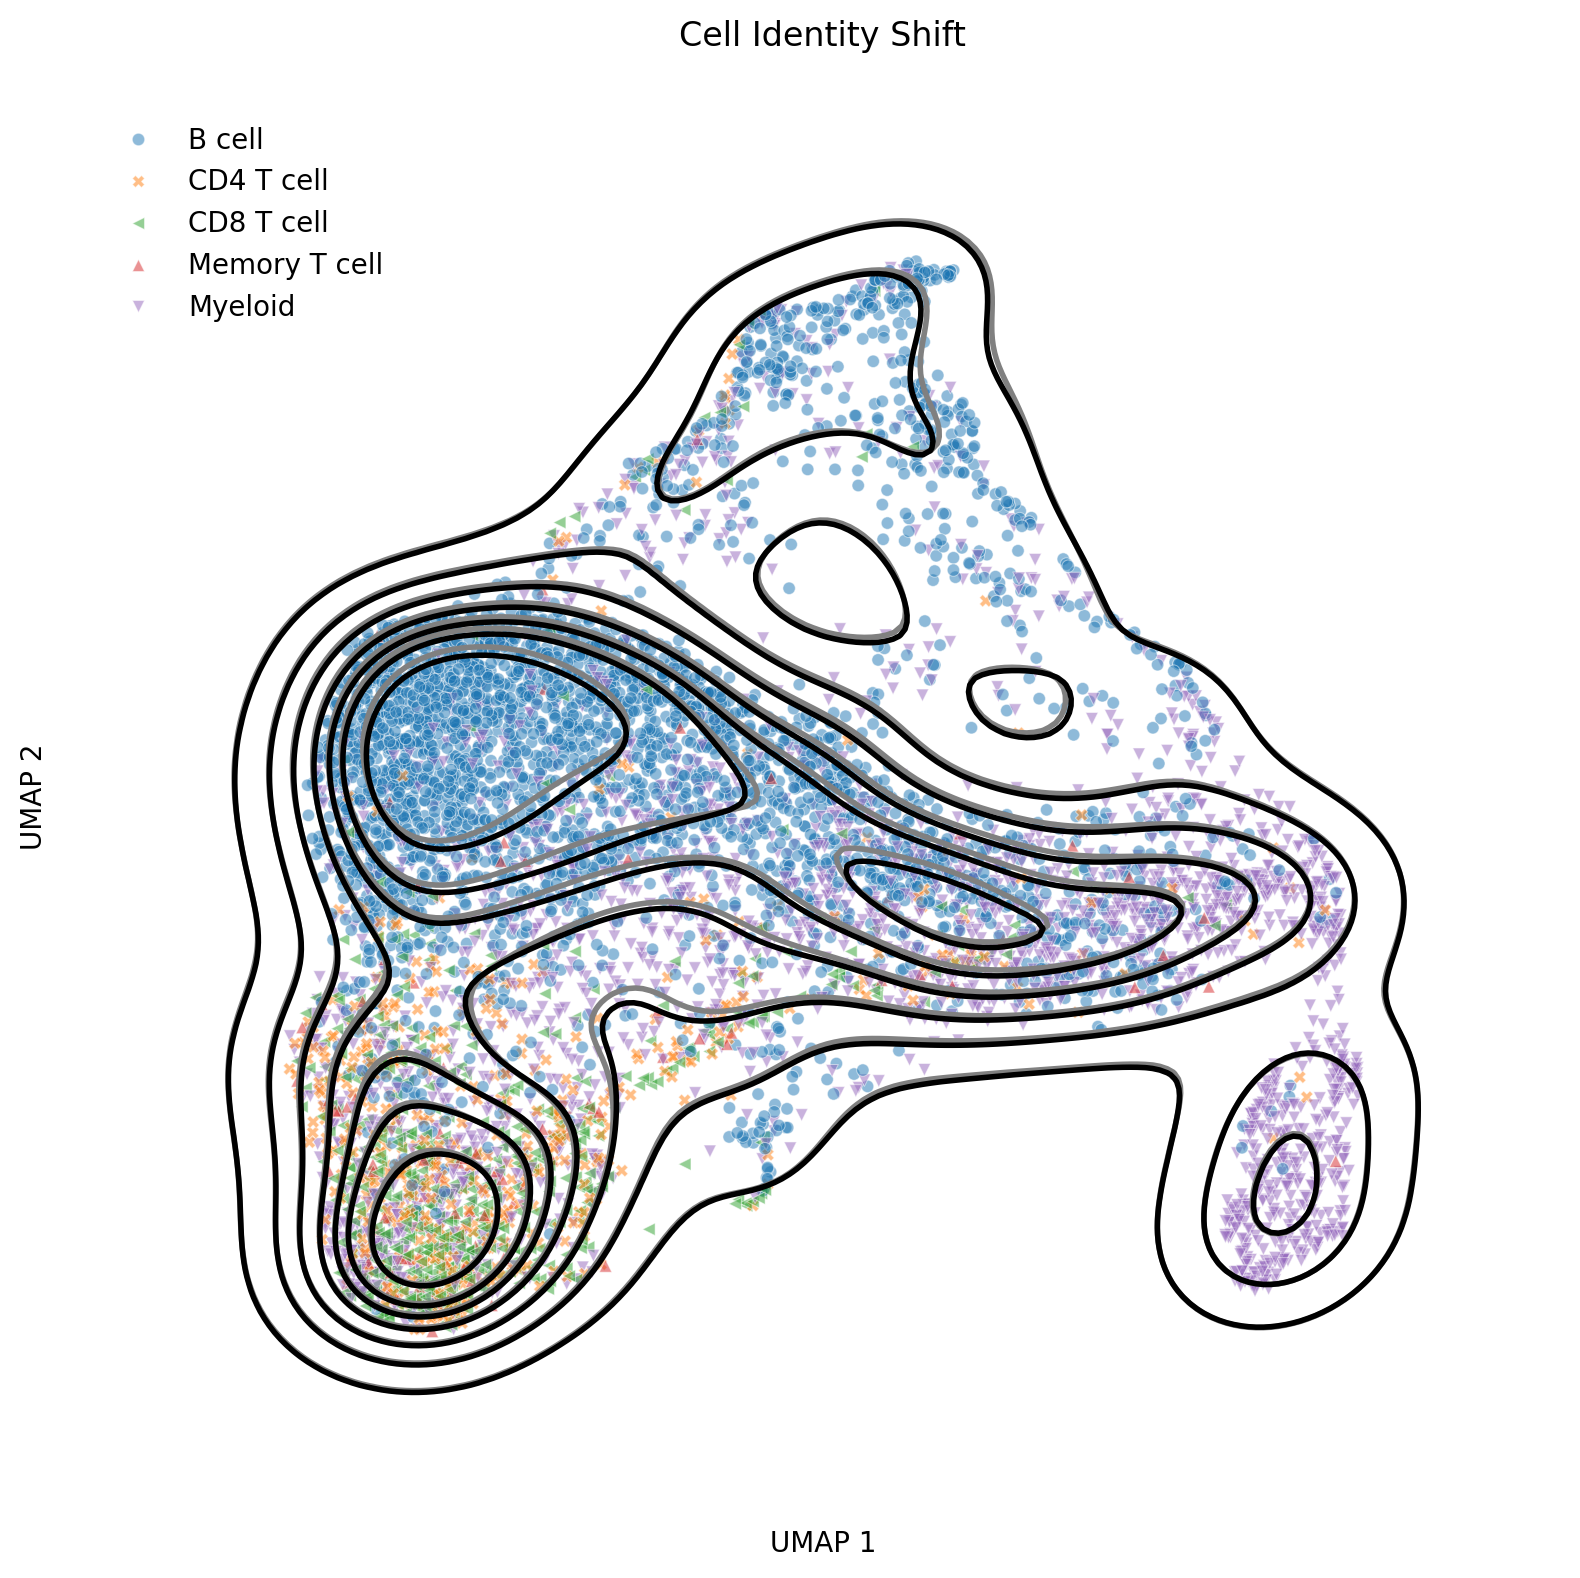

In [11]:
save_dir = '/ix/djishnu/shared/djishnu_kor11/results/spleen'
pythia.plot_contour_shift(savepath=f'{save_dir}/{goi}_contour_shift.png')

In [15]:
pythia.adata

AnnData object with n_obs × n_vars = 6891 × 3000
    obs: 'n_genes', 'n_UMIs', 'Cell_Type', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'log10_n_UMIs', 'log10_n_genes', 'donor_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene', 'n_beads', 'n_UMIs', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'fea

In [ ]:
pythia.plot_betas_goi(save_dir=save_dir)

> /ix/djishnu/alw399/SpaceOracle/src/spaceoracle/plotting/niche.py(23)get_modulator_betas()
     21 
     22     import pdb; pdb.set_trace()
---> 23     gene_mtx = so_obj.adata.layers['imputed_count']
     24     gene_mtx = MinMaxScaler().fit_transform(gene_mtx)
     25 

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


In [ ]:
pythia.plot_beta_neighborhoods(
    use_modulators=False,
    savepath=f'{save_dir}/beta_{goi}_neighborhoods.png'
)

pythia.plot_beta_neighborhoods(
    use_modulators=True,
    savepath=f'{save_dir}/beta_{goi}_neighborhoods.png'
)

In [ ]:
pythia.show_cluster_gex(embedding='spatial')
pythia.show_cluster_gex(embedding='FR')

In [ ]:
pythia.show_transitions(vector_scale=20)